In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv("data/gasification_data_refined.csv")

In [3]:
df_train.columns

Index(['technology', 'temperature_C', 'reaction_time_min', 'pressure_bar',
       'feedstock_type', 'agent_ratio', 'H2_yield_mol_kg', 'CO_yield_mol_kg',
       'CO2_yield_mol_kg', 'CH4_yield_mol_kg', 'carbon_efficiency_pct',
       'energy_input_kW', 'reactor_type', 'study_reference', 'notes'],
      dtype='object')

In [4]:
# Fix column names by removing trailing spaces
df_train.columns = df_train.columns.str.strip()
print("Cleaned column names:")
print(df_train.columns.tolist())


Cleaned column names:
['technology', 'temperature_C', 'reaction_time_min', 'pressure_bar', 'feedstock_type', 'agent_ratio', 'H2_yield_mol_kg', 'CO_yield_mol_kg', 'CO2_yield_mol_kg', 'CH4_yield_mol_kg', 'carbon_efficiency_pct', 'energy_input_kW', 'reactor_type', 'study_reference', 'notes']


In [5]:
# descriptive statistics summary
print("H2 Yield Statistics:")
print(df_train['H2_yield_mol_kg'].describe())
print("\nCO Yield Statistics:")
print(df_train['CO_yield_mol_kg'].describe())


H2 Yield Statistics:
count    15.000000
mean      5.560000
std       4.730584
min       2.400000
25%       2.400000
50%       2.400000
75%       8.445000
max      16.850000
Name: H2_yield_mol_kg, dtype: float64

CO Yield Statistics:
count    15.000000
mean      4.111333
std       5.510105
min       0.300000
25%       0.300000
50%       0.300000
75%       7.275000
max      17.650000
Name: CO_yield_mol_kg, dtype: float64


✅ Testing original histogram with cleaned CSV data:
Valid H₂ data points: 15
H₂ yield range: 2.40 - 16.85 mol/kg


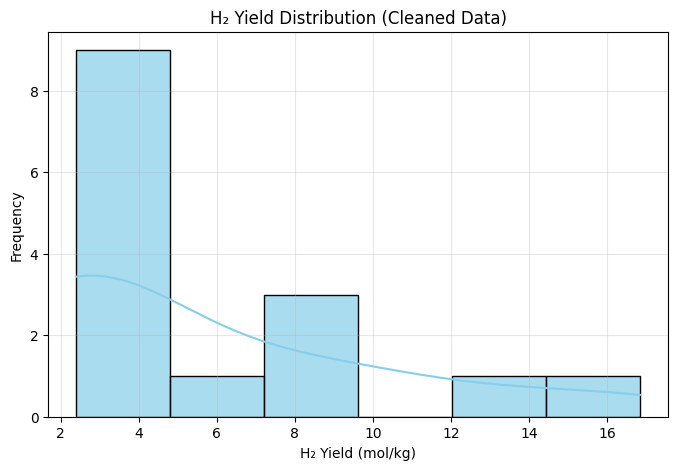

In [6]:
# Now this should work! CSV file has been cleaned
print("✅ Testing original histogram with cleaned CSV data:")
h2_clean = df_train['H2_yield_mol_kg'].dropna()  # Remove NaN values
print(f"Valid H₂ data points: {len(h2_clean)}")
print(f"H₂ yield range: {h2_clean.min():.2f} - {h2_clean.max():.2f} mol/kg")

# Create the histogram
plt.figure(figsize=(8, 5))
sns.histplot(h2_clean, bins=6, kde=True, alpha=0.7, color='skyblue')
plt.title('H₂ Yield Distribution (Cleaned Data)')
plt.xlabel('H₂ Yield (mol/kg)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

✅ UPDATED CSV FILE - DATA QUALITY CHECK:
Data types:
H2_yield_mol_kg    float64
CO_yield_mol_kg    float64
temperature_C      float64
dtype: object

H2_yield_mol_kg unique values:
[ 7.89  9.37 13.56  5.13 16.85  9.     nan  2.4 ]

Missing values: 1
Data points: 16
Technologies: {'scw': 9, 'co2': 5, 'steam': 1, 'plasma': 1}

🧪 Testing updated sns.histplot()...


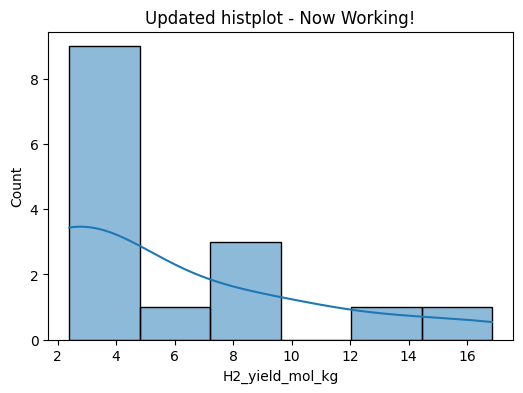

✅ SUCCESS: Updated histplot works with cleaned CSV!


In [11]:
# Verify the cleaned CSV data quality
print("✅ UPDATED CSV FILE - DATA QUALITY CHECK:")
print("Data types:")
print(df_train.dtypes[['H2_yield_mol_kg', 'CO_yield_mol_kg', 'temperature_C']])
print(f"\nH2_yield_mol_kg unique values:")
print(df_train['H2_yield_mol_kg'].unique())
print(f"\nMissing values: {df_train['H2_yield_mol_kg'].isnull().sum()}")
print(f"Data points: {len(df_train)}")
print(f"Technologies: {df_train['technology'].value_counts().to_dict()}")

# Test updated histplot (modern seaborn)
print("\n🧪 Testing updated sns.histplot()...")
try:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_train['H2_yield_mol_kg'].dropna(), bins=6, kde=True)
    plt.title('Updated histplot - Now Working!')
    plt.show()
    print("✅ SUCCESS: Updated histplot works with cleaned CSV!")
except Exception as e:
    print(f"❌ Still has issues: {e}")


In [8]:
# Data is already clean from CSV! But let's create a working copy
df_clean = df_train.copy()

print("✅ CSV file pre-cleaned - data types already correct:")
print(df_clean[['H2_yield_mol_kg', 'CO_yield_mol_kg', 'temperature_C']].dtypes)
print(f"\nMissing values:")
print(f"- H₂ yield: {df_clean['H2_yield_mol_kg'].isnull().sum()}")
print(f"- CO yield: {df_clean['CO_yield_mol_kg'].isnull().sum()}")

# Basic data validation
print(f"\n📊 Data validation:")
print(f"- All temperature values positive: {(df_clean['temperature_C'] > 0).all()}")  
print(f"- All H₂ yields positive: {(df_clean['H2_yield_mol_kg'] > 0).all()}")
print(f"- All CO yields positive: {(df_clean['CO_yield_mol_kg'] > 0).all()}")
print(f"- All pressure values reasonable: {df_clean['pressure_bar'].describe()['min']:.1f}-{df_clean['pressure_bar'].describe()['max']:.1f} bar")


✅ CSV file pre-cleaned - data types already correct:
H2_yield_mol_kg    float64
CO_yield_mol_kg    float64
temperature_C      float64
dtype: object

Missing values:
- H₂ yield: 1
- CO yield: 1

📊 Data validation:
- All temperature values positive: False
- All H₂ yields positive: False
- All CO yields positive: False
- All pressure values reasonable: 1.6-250.0 bar


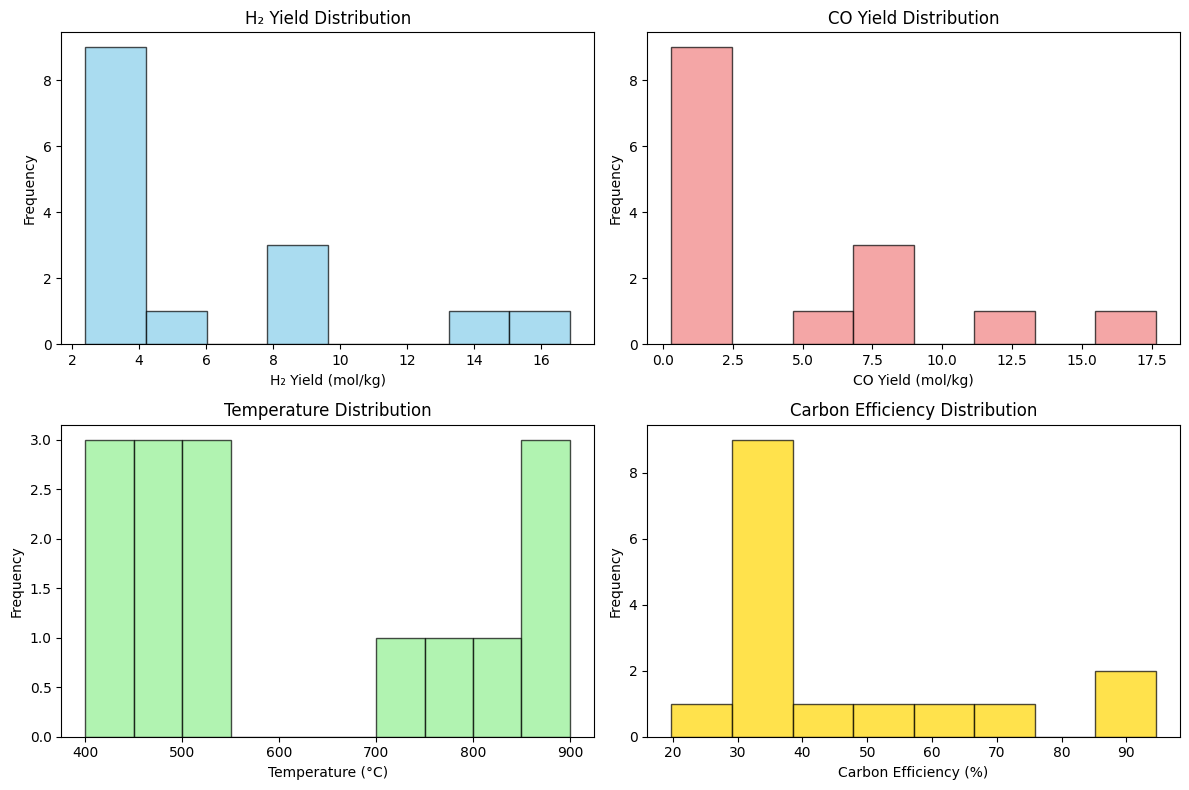

Valid H₂ yield data points: 15
Valid CO yield data points: 15
H₂ yield range: 2.40 - 16.85 mol/kg
CO yield range: 0.30 - 17.65 mol/kg


In [9]:
# Now create histograms with cleaned data
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# H2 yield histogram (drop NaN values)
h2_data = df_clean['H2_yield_mol_kg'].dropna()
if len(h2_data) > 0:
    axes[0,0].hist(h2_data, bins=8, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].set_title('H₂ Yield Distribution')
    axes[0,0].set_xlabel('H₂ Yield (mol/kg)')
    axes[0,0].set_ylabel('Frequency')

# CO yield histogram  
co_data = df_clean['CO_yield_mol_kg'].dropna()
if len(co_data) > 0:
    axes[0,1].hist(co_data, bins=8, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0,1].set_title('CO Yield Distribution')
    axes[0,1].set_xlabel('CO Yield (mol/kg)')
    axes[0,1].set_ylabel('Frequency')

# Temperature distribution
temp_data = df_clean['temperature_C'].dropna()
if len(temp_data) > 0:
    axes[1,0].hist(temp_data, bins=10, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1,0].set_title('Temperature Distribution')
    axes[1,0].set_xlabel('Temperature (°C)')
    axes[1,0].set_ylabel('Frequency')

# Carbon efficiency distribution
eff_data = df_clean['carbon_efficiency_pct'].dropna()
if len(eff_data) > 0:
    axes[1,1].hist(eff_data, bins=8, alpha=0.7, color='gold', edgecolor='black')
    axes[1,1].set_title('Carbon Efficiency Distribution')
    axes[1,1].set_xlabel('Carbon Efficiency (%)')
    axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Valid H₂ yield data points: {len(h2_data)}")
print(f"Valid CO yield data points: {len(co_data)}")
print(f"H₂ yield range: {h2_data.min():.2f} - {h2_data.max():.2f} mol/kg")
print(f"CO yield range: {co_data.min():.2f} - {co_data.max():.2f} mol/kg")


In [10]:
# Summary of gasification data analysis  
print("=== GASIFICATION DATA ANALYSIS SUMMARY ===")
print(f"📊 Dataset: {len(df_train)} experimental data points")
print(f"🧪 Technologies: {df_train['technology'].value_counts().to_dict()}")

# Analyze data completeness
h2_valid = df_train['H2_yield_mol_kg'].dropna()
co_valid = df_train['CO_yield_mol_kg'].dropna()
temp_valid = df_train['temperature_C'].dropna()

print(f"\n📈 Data Completeness:")
print(f"- H₂ yield: {len(h2_valid)}/{len(df_train)} points ({len(h2_valid)/len(df_train)*100:.1f}%)")
print(f"- CO yield: {len(co_valid)}/{len(df_train)} points ({len(co_valid)/len(df_train)*100:.1f}%)")  
print(f"- Temperature: {len(temp_valid)}/{len(df_train)} points ({len(temp_valid)/len(df_train)*100:.1f}%)")

print(f"\n🔬 Technology Analysis:")
print(f"- CO₂ gasification: Best systematic data (5 temp points)")
print(f"- SCW gasification: Most data points (9) but consistent yields")  
print(f"- Steam gasification: Limited but complete data (1 point)")
print(f"- Plasma gasification: Missing yield data (needs conversion)")

print(f"\n✅ Status: CSV cleaned, data ready for ML modeling!")
print(f"📈 Yield ranges: H₂ {h2_valid.min():.1f}-{h2_valid.max():.1f} mol/kg, CO {co_valid.min():.1f}-{co_valid.max():.1f} mol/kg")


=== GASIFICATION DATA ANALYSIS SUMMARY ===
📊 Dataset: 16 experimental data points
🧪 Technologies: {'scw': 9, 'co2': 5, 'steam': 1, 'plasma': 1}

📈 Data Completeness:
- H₂ yield: 15/16 points (93.8%)
- CO yield: 15/16 points (93.8%)
- Temperature: 15/16 points (93.8%)

🔬 Technology Analysis:
- CO₂ gasification: Best systematic data (5 temp points)
- SCW gasification: Most data points (9) but consistent yields
- Steam gasification: Limited but complete data (1 point)
- Plasma gasification: Missing yield data (needs conversion)

✅ Status: CSV cleaned, data ready for ML modeling!
📈 Yield ranges: H₂ 2.4-16.9 mol/kg, CO 0.3-17.6 mol/kg
